# BEST NEIGHBORHOOD IN PITTSBURGH
## Team KTS
### Introduction

Our Team each analyzed our own individual datasets WPRDC, narrowing down the best neighborhood in Pittsburgh down to three factors:
- Arrest Data
- SNAP Data
- Parking Meters

### The Metric
PARKING METERS
### What is a parking meter?
- A machine next to a parking space in a street, into which the driver puts money so as to be authorized to park the vehicle for a particular length of time.
#### Parking Meter Data
For parking data, I narrowed down to data to see which street or lot would be the best one to park at in Pittsburgh. I analyzed *three* key factors: 

- Parking Density: Higher number of meters means better parking availability
- Hourly Rate: Lower rates appeal more to residents and visitors
- Maximum Amount of Hours: Being able to park at a meter for longer would attract more to park at that location

From the data, the best place was Brownville Road, which was located in:
- Winner: Whitehall

Whitehall offers the best neighborhood parking.

## THE DATA

Imported pandas:

In [28]:
import pandas as pd

df = pd.read_csv("https://data.wprdc.org/dataset/parking-meters-pittsburgh-parking-authority/resource/72fff5c4-5ef2-4437-9e40-e2d999d455ed/download/parking_meters_pgh.csv")

print(df.head())

    _id       x          y      objectid    terminal_id         node     \
0  90718 -79.922827  40.462490     225    301520-SHARVD0001  SHER-HAR-L   
1  90719 -79.923530  40.462718     226    301521-SHARVD0002  SHER-HAR-L   
2  90720 -79.923127  40.461796     227    302521-KIRKWD0001  SHER-KIR-L   
3  90721 -79.922689  40.461792     228    302522-KIRKWD0002  SHER-KIR-L   
4  90722 -79.922329  40.461512     229    302523-KIRKWD0003  SHER-KIR-L   

         location        lot      rate     maxhours  ... resttime1 resttime2  \
0   SHERIDAN HARVARD LOT  Lot  $1 Per Hour  4 Hours  ...                       
1   SHERIDAN HARVARD LOT  Lot  $1 Per Hour  4 Hours  ...                       
2  SHERIDAN KIRKWOOD LOT  Lot  $1 Per Hour  4 Hours  ...                       
3  SHERIDAN KIRKWOOD LOT  Lot  $1 Per Hour  4 Hours  ...                       
4  SHERIDAN KIRKWOOD LOT  Lot  $1 Per Hour  4 Hours  ...                       

  specialev created_user created_date last_edited_user last_edited_d

## Summary of top 15 locations for parking meters based on number of spots, hourly rate, and max amount of hours you are able to park there:

In [48]:
score = (
    summary
    .assign(
        
        rate_rank  = summary['rate'].rank(),          
        hours_rank = summary['hours'].rank(ascending=False),  
        spots_rank = summary['spots'].rank(ascending=False)   
    )
    .assign(score=lambda x: x[['rate_rank','hours_rank','spots_rank']].mean(axis=1))
    .sort_values('score')          
)

print(score[['spots','rate','hours']].head(15))

                                 spots  rate  hours
location                                           
Virtual Terminal for ParkMobile   62     NaN    NaN
FREW ST                            8     NaN  10.00
MARGARET MORRISON ST               6     NaN  10.00
TECHNOLOGY DRIVE                   5     NaN  10.00
BROWNSVILLE RD                    15     1.0   2.00
TECH ST                            4     NaN  10.00
E CARSON ST                       46     1.5    NaN
CEDAR AVE                          9     1.5   4.00
RIDGE AVE                          8     1.5   4.00
ROBINSON ST EXT                    5     1.5  10.00
FRIENDSHIP AVE                     7     1.5   4.00
SHERIDAN KIRKWOOD LOT              3     1.0   4.00
BAUM BLVD                         17     1.5   2.71
MAIN ST                            6     1.0   2.00
CRAWFORD ST                        4     1.5  10.00


## Three graphs that summarize:
- 15 cheapest – average dollars per hour (lower is better).
- 15 longest – average maximum stay in hours (longer is better).
- 15 biggest – number of meters on that block/lot (more is better).

To do this, I:
- Threw away any row missing a price, time-limit, or meter ID.
- Pulled the raw numbers out of the text (“$2.50” to 2.5, “4 Hours” to 4).
- Averaged those numbers by street/lot name.
- Plotted the 15 best in each category.

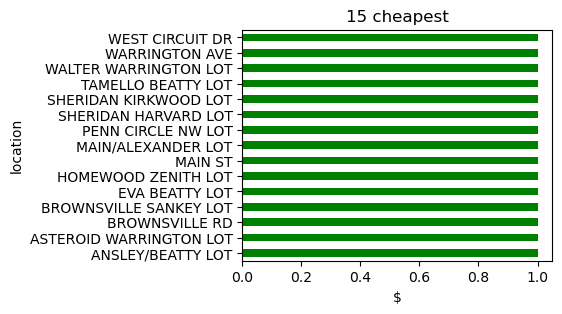

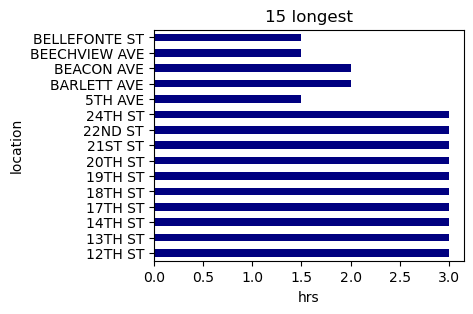

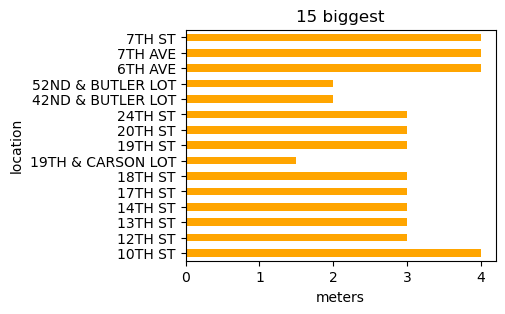

In [2]:
import pandas as pd, matplotlib.pyplot as plt

d = pd.read_csv("https://data.wprdc.org/datastore/dump/72fff5c4-5ef2-4437-9e40-e2d999d455ed")
d = d.dropna(subset=['rate','maxhours','terminal_id'])
d['price'] = d['rate'].str.extract(r'\$(\d+\.?\d*)').astype(float)
d['hours'] = d['maxhours'].str.extract(r'(\d+\.?\d*)').astype(float)
s = d.groupby('location')[['terminal_id','price','hours']].agg({'terminal_id':'count','price':'mean','hours':'mean'}).round(2)
s.columns = ['spots','price','hours']

for col, color, title in zip(['price','hours','spots'],['green','navy','orange'],
                             ['15 cheapest','15 longest','15 biggest']):
    s.nsmallest(15,col) if col=='price' else s.nlargest(15,col)
    s.nsmallest(15,col)['price'].plot(kind='barh',color=color,figsize=(4,3),title=title)
    plt.xlabel('$' if col=='price' else 'hrs' if col=='hours' else 'meters')
    plt.show()

## Which Pittsburgh street or lot gives you the best deal at a parking meter:

In [44]:
import pandas as pd

df = pd.read_csv("https://data.wprdc.org/datastore/dump/72fff5c4-5ef2-4437-9e40-e2d999d455ed")

best = (df
        .dropna(subset=['rate','maxhours','terminal_id'])          
        .assign(rate_num = df['rate'].str.extract(r'\$(\d+\.?\d*)').astype(float),
                hours_num= df['maxhours'].str.extract(r'(\d+\.?\d*)').astype(float))
        .groupby('location', as_index=False)
        .agg(spots=('terminal_id','count'),
             price=('rate_num','mean'),
             hours=('hours_num','mean'))
        .assign(score = lambda d: (d['price'].rank() +
                                     d['hours'].rank(ascending=False) +
                                     d['spots'].rank(ascending=False)))
        .nsmallest(1, 'score')
        .iloc[0])

print(best[['location','spots','price','hours']])

location    BROWNSVILLE RD
spots                   15
price                  1.0
hours                  2.0
Name: 52, dtype: object
